<a href="https://colab.research.google.com/github/elf7979/python_practice/blob/master/logistics_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

df.tail()
# print(cancer.target) target is binary daty to classify to have cancer or not

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


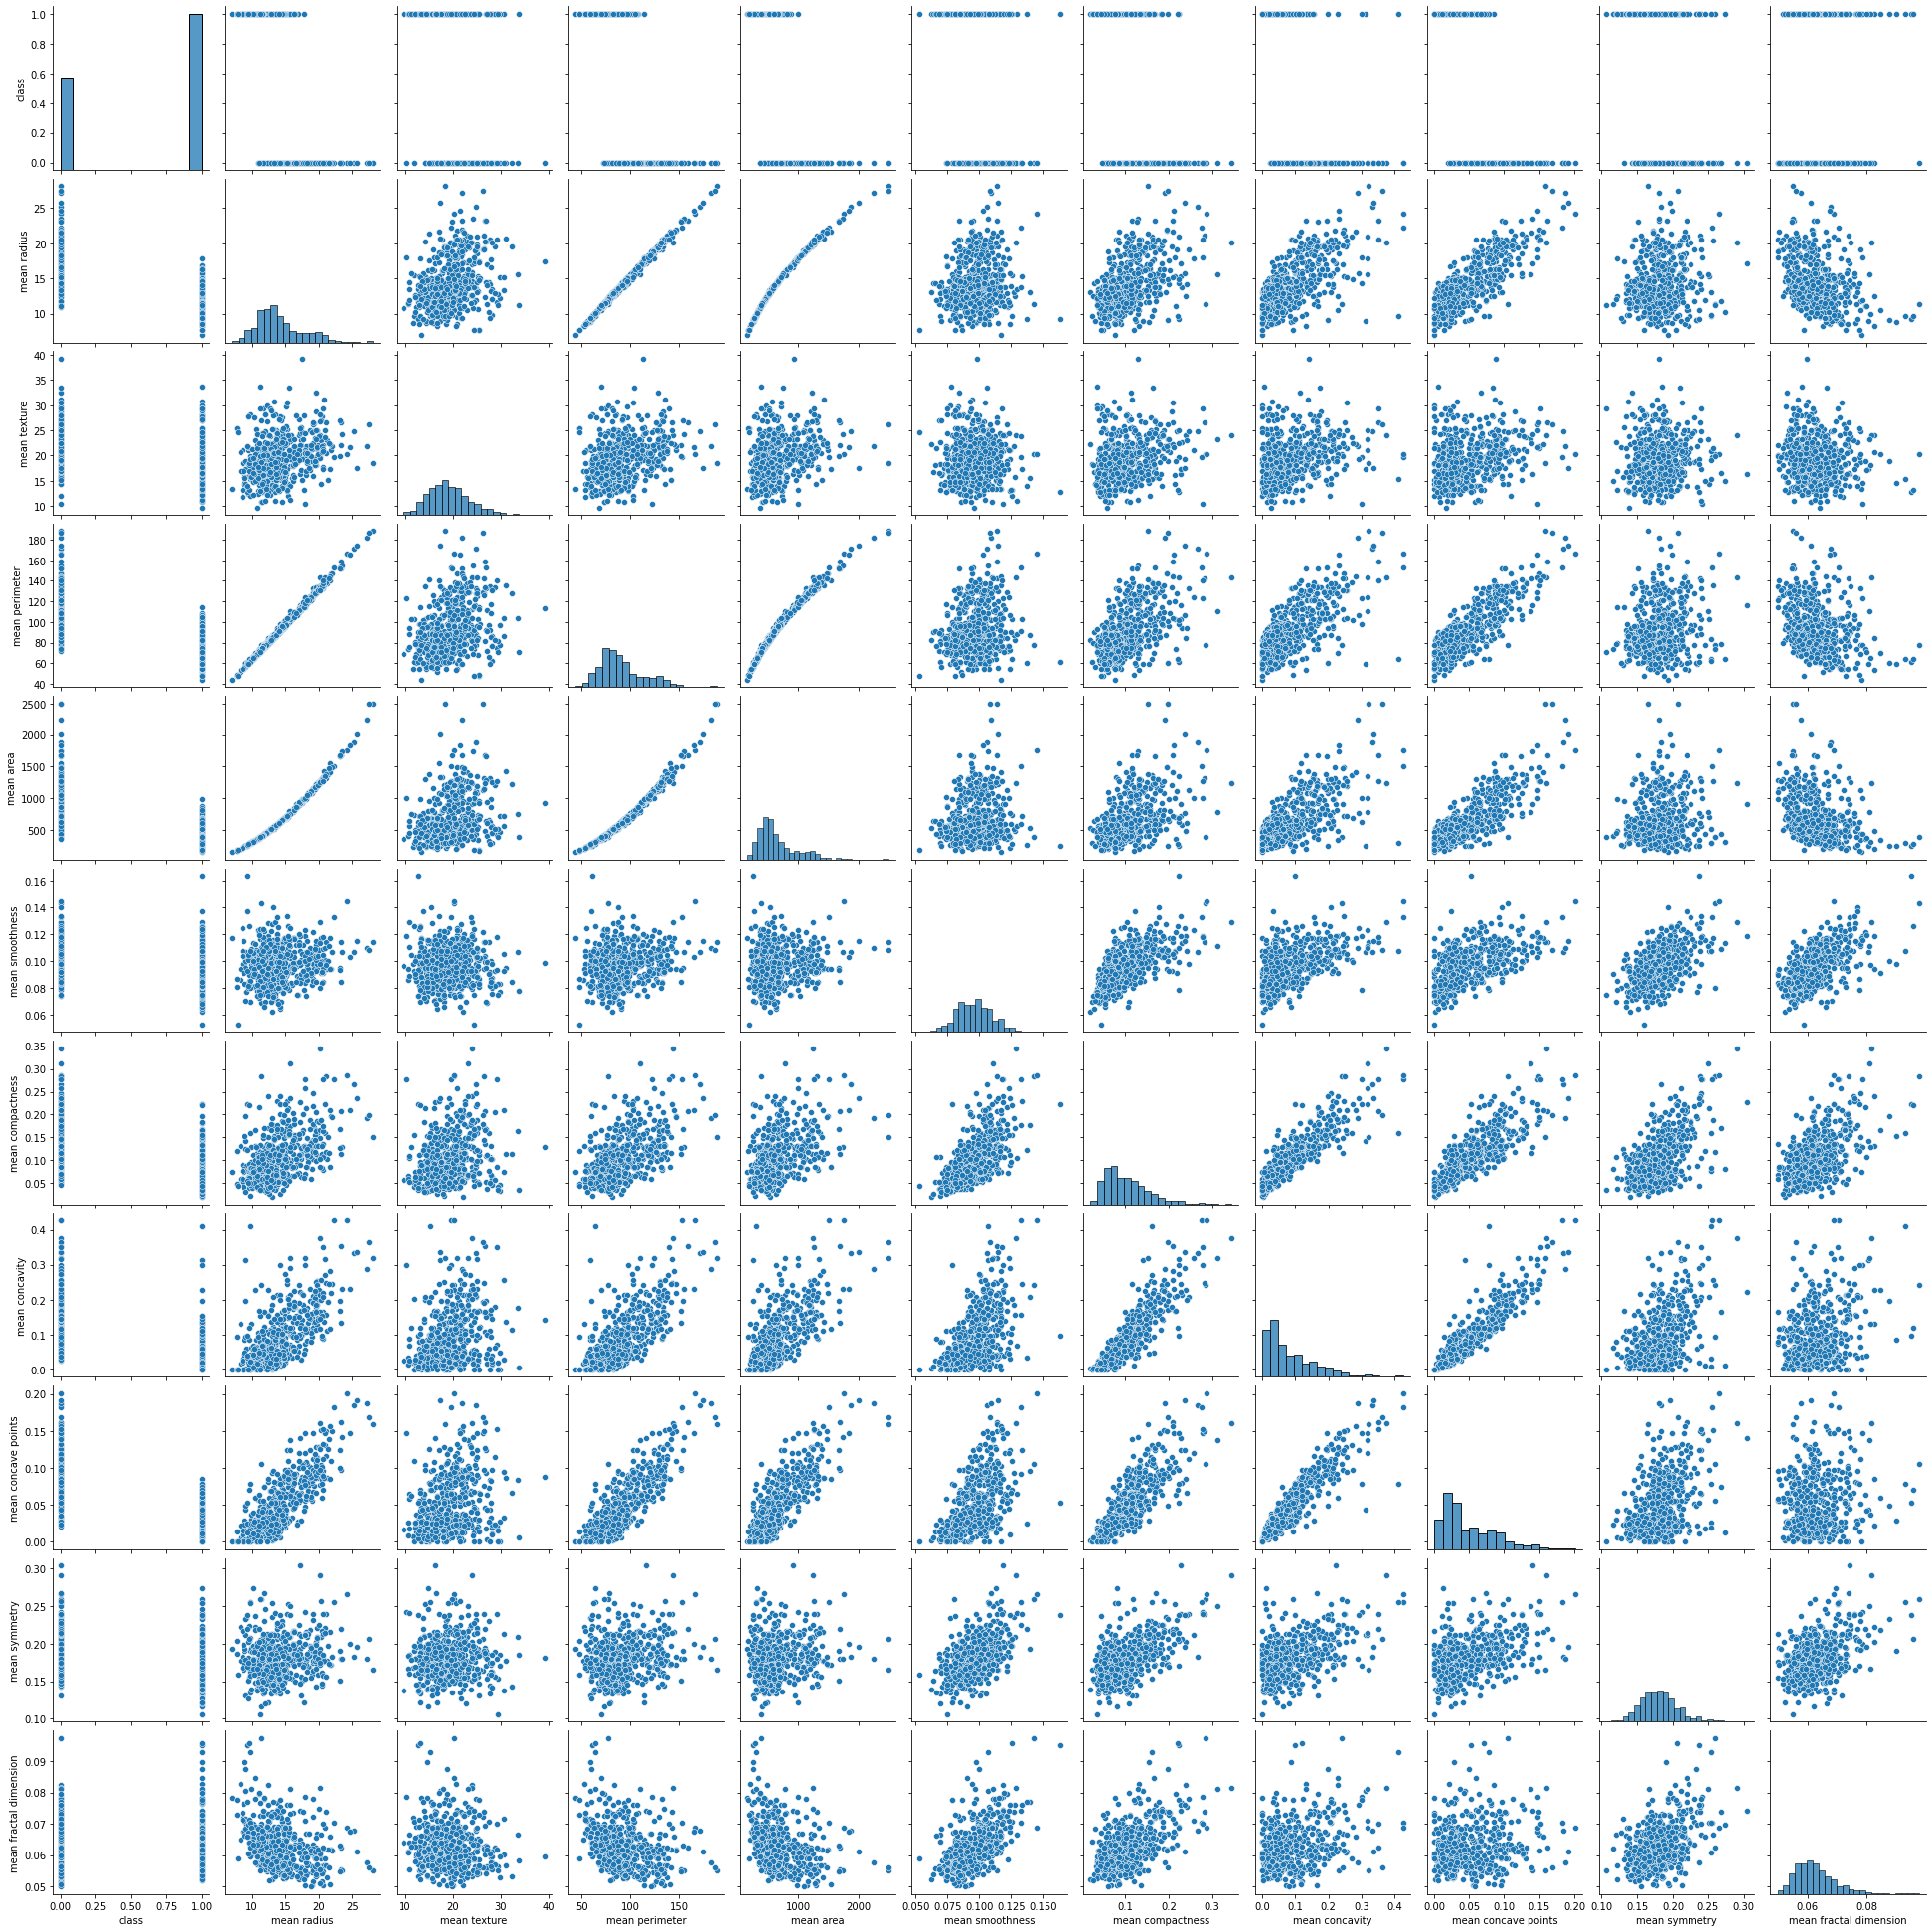

In [ ]:
sns.pairplot(df[['class'] + list(df.columns[:10])])
plt.show()

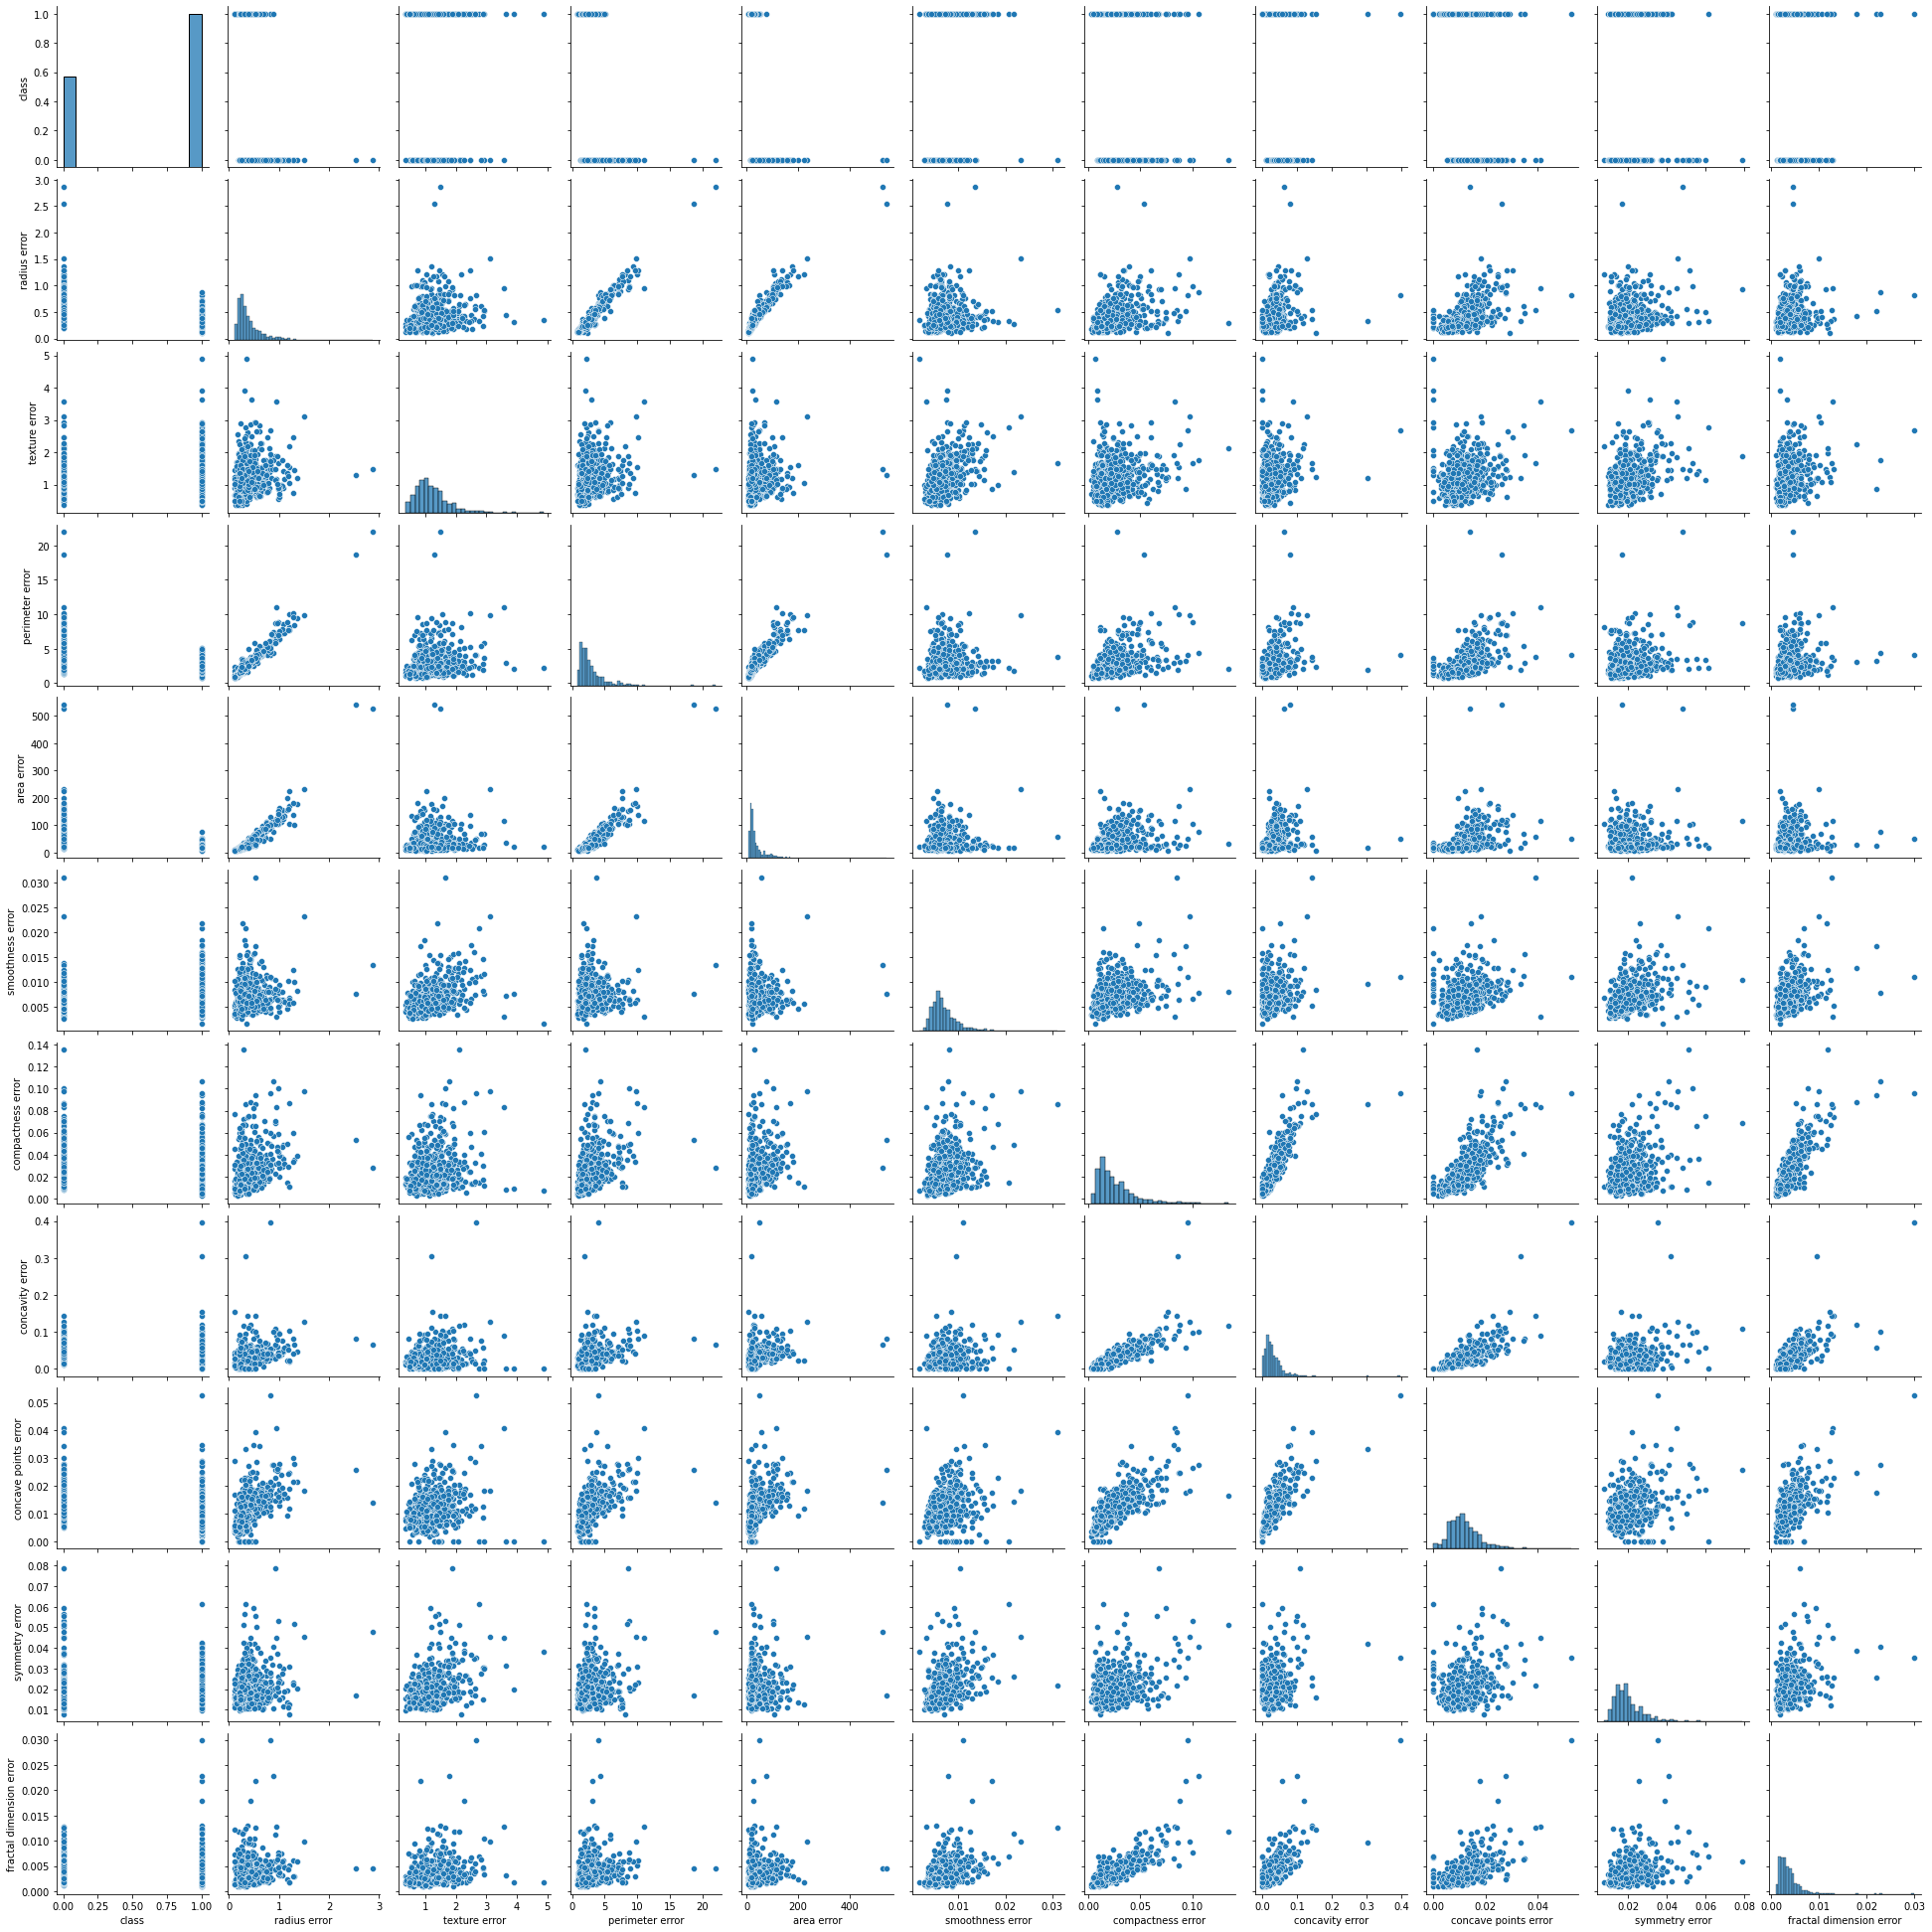

In [ ]:
sns.pairplot(df[['class'] + list(df.columns[10:20])])
plt.show()

In [ ]:
cols = ['mean radius', 'mean texture', 
        'mean smoothness', 'mean compactness', 'mean concave points', 
        'worst radius', 'worst texture',
        'worst smoothness', 'worst compactness', 'worst concave points', 'class']

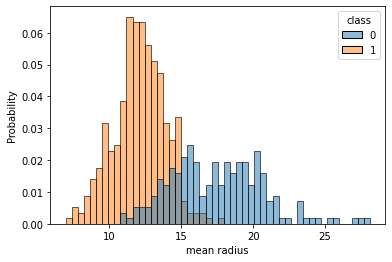

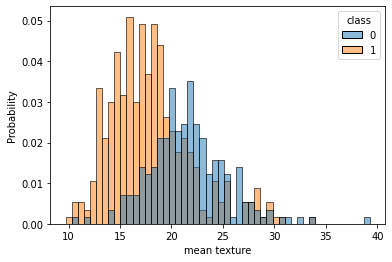

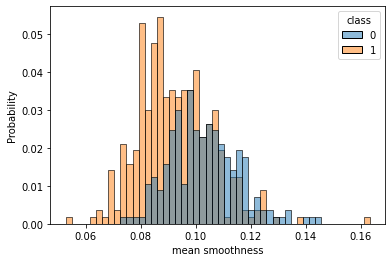

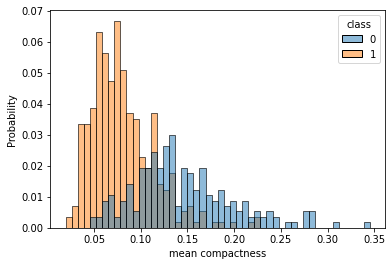

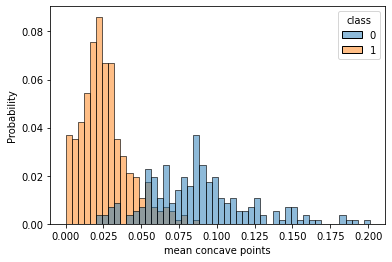

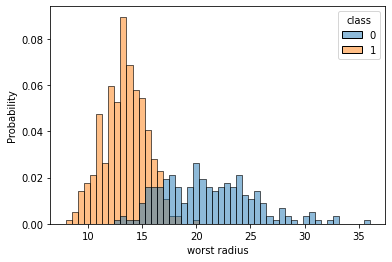

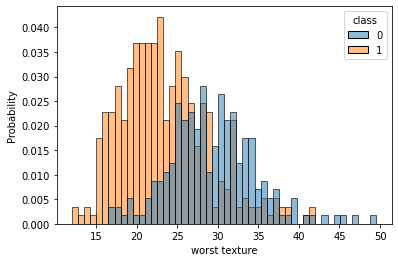

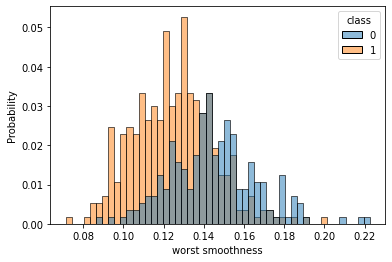

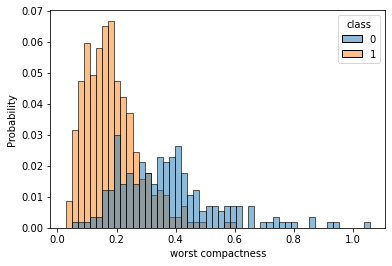

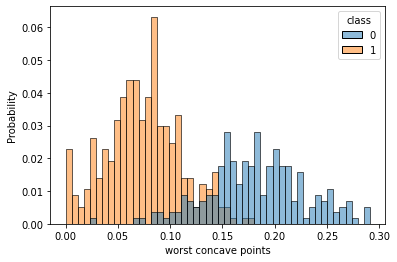

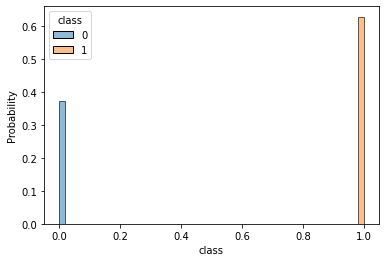

In [ ]:
for c in cols:
  sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
  plt.show()

##### Train Model with PYthon

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
data = torch.from_numpy(df[cols].values).float()

data.shape

torch.Size([569, 11])

### dimension이 11개 인데

### 이거를 x와 y로 나눈다. 그래서 x는 슬라이싱을 마지막 바로 앞에까지 해서 data[:, :-1] <- 처음부터 마지막

### 그리고 y는 data[:, -1:] 슬라이싱을 끝에서 딱 하나만 슬라이싱

### 결과값이 그래서 x = [569, 10], y= [569, 1]

In [ ]:
x = data[:, :-1]
y = data[:, -1:]

print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [ ]:
#학습을 위한 configure
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

In [ ]:
#cost model 정의
#nn.module을 상속받아서 나만의 클래스를 만든다

class MyModel(nn.Module):

  def __init__(self, input_dim, output_dim): #인자를 인풋 디멘젼과 아웃풋 디멘젼
    self.input_dim = input_dim
    self.output_dim = output_dim

    super().__init__()

    self.linear = nn.Linear(input_dim, output_dim)  #input_dim과 아웃품 dim을 미분?
    self.act = nn.Sigmoid()  #로지스틱 리그레션이니 sigmoid 시켜줌

  def forward(self, x): #이 친구가 미분 아님?
    #
    y = self.act(self.linear(x)) #self.linear 결과값이 nx1 ->위 input_dim을 미분하면 스칼라 or 하나의 벡터값

    return y

In [ ]:
model = MyModel(input_dim = x.size(-1),output_dim = y.size(-1))

crit = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for i in range(n_epochs):
  y_hat = model(x)
  loss = crit(y_hat, y)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  if (i + 1) % print_interval == 0:
    print('Epoch %d: loss =%.4e' % (1+1, loss))

Epoch 2: loss =2.7660e-01
Epoch 2: loss =2.2834e-01
Epoch 2: loss =1.9948e-01
Epoch 2: loss =1.8062e-01
Epoch 2: loss =1.6744e-01
Epoch 2: loss =1.5772e-01
Epoch 2: loss =1.5027e-01
Epoch 2: loss =1.4436e-01
Epoch 2: loss =1.3957e-01
Epoch 2: loss =1.3560e-01
Epoch 2: loss =1.3224e-01
Epoch 2: loss =1.2937e-01
Epoch 2: loss =1.2689e-01
Epoch 2: loss =1.2472e-01
Epoch 2: loss =1.2279e-01
Epoch 2: loss =1.2108e-01
Epoch 2: loss =1.1955e-01
Epoch 2: loss =1.1817e-01
Epoch 2: loss =1.1691e-01
Epoch 2: loss =1.1576e-01


## Let's predict

In [ ]:
correct_count = (y == (y_hat > .5)).sum()
total_count = float(y.size(0))

print(f"Accuracy : {correct_count/total_count}")

Accuracy : 0.9666081070899963


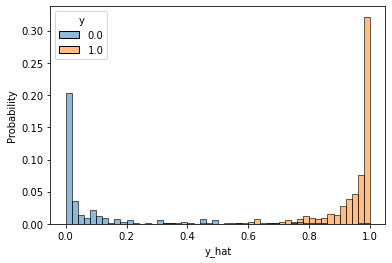

In [ ]:
df = pd.DataFrame(torch.cat([y, y_hat], dim = 1).detach().numpy(), columns=["y", "y_hat"])

sns.histplot(df, x = 'y_hat', hue = 'y', bins=50, stat='probability')
plt.show()